In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

In [25]:
def normalize(X):
    n = X.shape[0]
    mean = np.mean(X, axis=1).reshape((n, 1))
    std = np.std(X, axis=1).reshape((n, 1))
    X_new = (X - mean) / std**2
    return X_new, mean, std

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
def plot_data(x, y):
    ax = plt.gca()
    ax.scatter(X[:,0], x[:,1], c=(y == 1), cmap=cm_bright)

In [28]:
def fwd_pass(X, params):
    W = params["W"]
    b = params["b"]
    
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    
    cache = (W, b, Z, A)
    
    return A, cache

In [29]:
def cost(A, Y):
    m = Y.shape[1]
    
    L = - Y * np.log(A) - (1 - Y) * np.log(1 - A)
    J = np.sum(L) / m
    
    return J

In [30]:
def bwd_pass(X, Y, cache):
    n, m = X.shape
    (W, b, Z, A) = cache
    
    dZ = A - Y
    dW = 1. / m * np.dot(X, dZ.T).reshape((1, n))
    db = 1. / m * np.sum(dZ)
    
    grads = {"dW" : dW, "db" : db, "dZ" : dZ}
    return grads

In [31]:
def init_params(n, m):
    W = np.random.randn(1, n) * 0.01
    b = 0
    
    params = {"W" : W, "b" : b}
    return params

In [32]:
def update_params(params, grads, learning_rate):
    W = params["W"]
    b = params["b"]
    
    dW = grads["dW"]
    db = grads["db"]
    
    params["W"] = W - learning_rate * dW
    params["b"] = b - learning_rate * db
    
    return params

In [33]:
def fit(X, Y, learning_rate = 0.01, num_iter = 30000, debug = False):
    n, m = X.shape 
    params = init_params(n, m)
    costs = []
    for i in range(num_iter):
        A, cache = fwd_pass(X, params)
        curr_cost = cost(A, Y)
        grads = bwd_pass(X, Y, cache)
        
        params = update_params(params, grads, learning_rate)
        
        if debug and i % 10 == 0:
            print("{}-th iteration: {}".format(i, curr_cost))
            costs.append(curr_cost)
    
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("Iteration, *10")
    plt.show()
    
    return params    

In [34]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
df = pd.read_csv("sats.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(100, 2), y=(100,)


In [35]:
data_columns = ["test1", "test2"]
target_column = "passed"
df = pd.read_csv("tests.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(118, 2), y=(118,)


In [36]:
data_columns = ["test1", "test2", "test1test1", "test2test2", "test1test2", "test1test1test1", "test2test2test2"]
target_column = "passed"
df = pd.read_csv("testsCom.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(118, 7), y=(118,)


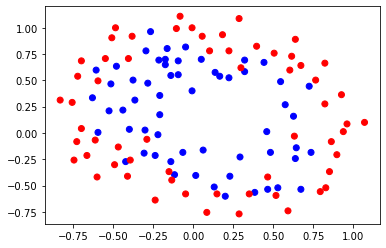

In [37]:
plot_data(X, Y)

In [38]:
Y = Y.values.reshape((df.shape[0], 1))

In [39]:
X, Y = X.T, Y.T

In [40]:
X, mean, std = normalize(X)

In [41]:
X[:,:5]

array([[-0.60317345, -0.01435925, -1.09777917, -1.75725074, -2.32251793],
       [ 1.87362608,  1.92821021,  1.90091814,  1.19132449,  1.05486417],
       [-3.90194657, -3.99946939, -3.29665705, -1.74627385,  0.25880084],
       [ 2.0899842 ,  2.34213524,  2.21539406, -0.61258054, -1.05324385],
       [-0.76431824,  1.23204463, -2.46000243, -3.2711155 , -4.28888063],
       [-0.81067086, -0.79820379, -0.93050954, -1.50509379, -2.60774817],
       [ 1.69714712,  1.89645037,  1.79574649, -0.1488716 , -0.39246017]])

In [42]:
Y.shape

(1, 118)

In [43]:
mean

array([[ 0.05477891],
       [ 0.18310156],
       [ 0.24757534],
       [ 0.30136961],
       [-0.02547184],
       [ 0.05983333],
       [ 0.14235001]])

In [44]:
std

array([[0.49454485],
       [0.51753592],
       [0.24747703],
       [0.28332819],
       [0.22312342],
       [0.27347972],
       [0.32474925]])

0-th iteration: 0.6849845868312888
10-th iteration: 0.47743172583929355
20-th iteration: 0.43204416674192275
30-th iteration: 0.4088297641298897
40-th iteration: 0.39486204117870105
50-th iteration: 0.38552991221445315
60-th iteration: 0.37883018030340854
70-th iteration: 0.37376894039099245
80-th iteration: 0.369800757875665
90-th iteration: 0.36660200094453127
100-th iteration: 0.3639683440181694
110-th iteration: 0.3617640889638257
120-th iteration: 0.35989524050798943
130-th iteration: 0.3582943355552658
140-th iteration: 0.3569114658314648
150-th iteration: 0.3557087396499503
160-th iteration: 0.35465674015347864
170-th iteration: 0.353732187633945
180-th iteration: 0.35291635258549436
190-th iteration: 0.35219395078193866
200-th iteration: 0.3515523560833988
210-th iteration: 0.35098102771216816
220-th iteration: 0.3504710854756266
230-th iteration: 0.35001498911176204
240-th iteration: 0.3496062922890968
250-th iteration: 0.3492394510682478
260-th iteration: 0.3489096727427792
2

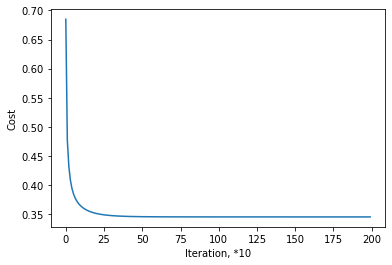

In [45]:
params = fit(X, Y, learning_rate = 0.1, num_iter = 2000, debug = True)

In [46]:
print(params)

{'W': array([[ 0.82581156,  1.31051394, -0.72785852, -0.87439014, -0.36752849,
        -0.03495868, -0.22265177]]), 'b': -0.2544316447511202}
